#### **Célula 1:** Instalação e Importação
Esta célula garante que as ferramentas estão prontas.

1. Configuração do Ambiente e Bibliotecas
Nesta etapa, importamos as bibliotecas necessárias para a manipulação de dados (pandas) e para a interface com a API da Base dos Dados, garantindo o acesso aos repositórios de dados públicos.

In [16]:
import basedosdados as bd
import pandas as pd

#### **Célula 2:** A "Bala de Prata" (Download Corrigido)
O erro "No matching signature" acontecia porque a coluna valor_remuneracao_media não existe mais com esse nome exato; agora ela se chama valor_remuneracao_media_sm (em salários mínimos) ou valor_remuneracao_media_nominal. Use este código que já resolve a assinatura do BigQuery:

2. Extração de Dados do Mercado de Trabalho (RAIS)
Realizamos uma consulta SQL no BigQuery para extrair os microdados da RAIS (Relação Anual de Informações Sociais) para os 771 municípios da Amazônia Legal. Os dados são agregados por município e ano para gerar a Massa Salarial Nominal (em salários mínimos) e o Total de Vínculos Formais, variáveis cruciais para captar a dinâmica econômica local.

In [5]:
# 1. Configuração do ID do seu projeto
billing_id = "my-project-mestrado-ppgom"

# 2. Query Corrigida: IDs de município como STRING (entre aspas)
query = """
SELECT 
    ano, 
    id_municipio, 
    valor_remuneracao_media_sm,
    tempo_emprego
FROM `basedosdados.br_me_rais.microdados_vinculos`
WHERE id_municipio IN ('1100015', '1100023', '1100031', '1100049', '1100056', '1100064', '1100072', '1100080', '1100098', '1100106', '1100114', '1100122', '1100130', '1100148', '1100155', '1100189', '1100205', '1100254', '1100262', '1100288', '1100296', '1100304', '1100320', '1100338', '1100346', '1100379', '1100403', '1100452', '1100502', '1100601', '1100700', '1100809', '1100908', '1100924', '1100940', '1101005', '1101104', '1101203', '1101302', '1101401', '1101435', '1101450', '1101468', '1101476', '1101484', '1101492', '1101500', '1101559', '1101609', '1101708', '1101757', '1101807', '1300029', '1300060', '1300086', '1300102', '1300144', '1300201', '1300300', '1300409', '1300508', '1300607', '1300631', '1300680', '1300706', '1300805', '1300839', '1300904', '1301001', '1301100', '1301159', '1301209', '1301308', '1301407', '1301506', '1301605', '1301654', '1301704', '1301803', '1301852', '1301902', '1302009', '1302108', '1302207', '1302306', '1302405', '1302504', '1302553', '1302603', '1302702', '1302801', '1302900', '1303007', '1303106', '1303205', '1303304', '1303403', '1303502', '1303536', '1303569', '1303601', '1303700', '1303809', '1303908', '1303957', '1304005', '1304062', '1304104', '1304203', '1304237', '1304260', '1304302', '1304401', '1400027', '1400050', '1400100', '1400159', '1400175', '1400209', '1400233', '1400282', '1400308', '1400407', '1400456', '1400472', '1400506', '1400605', '1400704', '1500107', '1500131', '1500206', '1500305', '1500347', '1500404', '1500503', '1500602', '1500701', '1500800', '1500859', '1500909', '1500958', '1501006', '1501105', '1501204', '1501253', '1501303', '1501402', '1501451', '1501501', '1501576', '1501600', '1501709', '1501725', '1501758', '1501782', '1501808', '1501907', '1501956', '1502004', '1502103', '1502152', '1502202', '1502301', '1502400', '1502509', '1502608', '1502707', '1502756', '1502764', '1502772', '1502806', '1502855', '1502905', '1502939', '1502954', '1503002', '1503044', '1503077', '1503093', '1503101', '1503200', '1503309', '1503408', '1503457', '1503507', '1503606', '1503705', '1503754', '1503804', '1503903', '1504000', '1504059', '1504109', '1504208', '1504307', '1504406', '1504422', '1504455', '1504505', '1504604', '1504703', '1504802', '1504901', '1504950', '1504976', '1505007', '1505031', '1505064', '1505106', '1505205', '1505304', '1505403', '1505437', '1505486', '1505494', '1505502', '1505536', '1505551', '1505601', '1505635', '1505650', '1505700', '1505809', '1505908', '1506005', '1506104', '1506112', '1506138', '1506161', '1506187', '1506195', '1506203', '1506302', '1506351', '1506401', '1506500', '1506559', '1506583', '1506609', '1506708', '1506807', '1506906', '1507003', '1507102', '1507151', '1507201', '1507300', '1507409', '1507458', '1507466', '1507474', '1507508', '1507607', '1507706', '1507755', '1507805', '1507904', '1507953', '1507961', '1507979', '1508001', '1508035', '1508050', '1508084', '1508100', '1508126', '1508159', '1508209', '1508308', '1508357', '1508407', '1600055', '1600105', '1600154', '1600204', '1600212', '1600238', '1600253', '1600279', '1600303', '1600402', '1600501', '1600535', '1600550', '1600600', '1600709', '1600808', '1700251', '1700301', '1700350', '1700400', '1700707', '1701002', '1701051', '1701101', '1701309', '1701903', '1702000', '1702109', '1702158', '1702208', '1702307', '1702406', '1702554', '1702703', '1702901', '1703008', '1703040', '1703057', '1703073', '1703107', '1703206', '1703305', '1703602', '1703701', '1703800', '1703826', '1703842', '1703867', '1703883', '1703891', '1703909', '1704105', '1704600', '1705102', '1705508', '1705557', '1705607', '1706001', '1706100', '1706258', '1706506', '1707009', '1707108', '1707207', '1707306', '1707405', '1707553', '1707652', '1707702', '1708205', '1708254', '1708304', '1709005', '1709302', '1709500', '1709807', '1710508', '1710706', '1710904', '1711100', '1711506', '1711803', '1711902', '1711951', '1712009', '1712108', '1712157', '1712405', '1712454', '1712504', '1712702', '1712801', '1713205', '1713304', '1713601', '1713700', '1713809', '1713908', '1714203', '1714302', '1714880', '1715002', '1715101', '1715150', '1715259', '1715507', '1715705', '1715754', '1716109', '1716208', '1716307', '1716505', '1716604', '1716653', '1716703', '1717008', '1717206', '1717505', '1717802', '1717901', '1718008', '1718206', '1718305', '1718404', '1718453', '1718503', '1718552', '1718651', '1718701', '1718750', '1718800', '1718842', '1718867', '1718883', '1718891', '1718909', '1719006', '1720004', '1720103', '1720152', '1720202', '1720251', '1720301', '1720491', '1720657', '1720806', '1720855', '1720905', '1720939', '1720970', '1721002', '1721101', '1721200', '1721259', '1721309', '1722083', '1722109', '2100055', '2100105', '2100154', '2100204', '2100303', '2100402', '2100436', '2100477', '2100501', '2100550', '2100600', '2100709', '2100808', '2100832', '2100873', '2100907', '2100956', '2101004', '2101103', '2101202', '2101251', '2101301', '2101350', '2101400', '2101509', '2101608', '2101707', '2101731', '2101772', '2101806', '2101905', '2101939', '2101970', '2102004', '2102038', '2102079', '2102103', '2102152', '2102202', '2102301', '2102327', '2102350', '2102376', '2102400', '2102509', '2102558', '2102608', '2102707', '2102756', '2102806', '2102905', '2103002', '2103101', '2103127', '2103150', '2103176', '2103200', '2103259', '2103309', '2103408', '2103507', '2103556', '2103606', '2103705', '2103754', '2103804', '2103903', '2104000', '2104059', '2104075', '2104083', '2104091', '2104109', '2104208', '2104307', '2104406', '2104505', '2104554', '2104604', '2104620', '2104653', '2104679', '2104703', '2104802', '2104901', '2105007', '2105106', '2105155', '2105205', '2105304', '2105353', '2105403', '2105429', '2105452', '2105478', '2105508', '2105607', '2105656', '2105706', '2105805', '2105904', '2105920', '2105946', '2105961', '2105987', '2106001', '2106100', '2106209', '2106308', '2106324', '2106357', '2106373', '2106407', '2106506', '2106605', '2106639', '2106704', '2106753', '2106803', '2106902', '2107009', '2107108', '2107207', '2107256', '2107306', '2107355', '2107405', '2107454', '2107504', '2107603', '2107702', '2107801', '2107900', '2108007', '2108056', '2108106', '2108205', '2108254', '2108304', '2108403', '2108452', '2108502', '2108601', '2108700', '2108809', '2108908', '2109005', '2109054', '2109104', '2109203', '2109237', '2109278', '2109302', '2109401', '2109450', '2109500', '2109559', '2109609', '2109708', '2109757', '2109807', '2109906', '2110003', '2110102', '2110201', '2110235', '2110276', '2110300', '2110409', '2110508', '2110607', '2110656', '2110706', '2110805', '2110854', '2110904', '2111001', '2111027', '2111050', '2111076', '2111100', '2111209', '2111258', '2111308', '2111407', '2111506', '2111530', '2111571', '2111605', '2111639', '2111670', '2111704', '2111720', '2111746', '2111761', '2111787', '2111803', '2111902', '2111951', '2112009', '2112108', '2112207', '2112231', '2112272', '2112306', '2112405', '2112454', '2112504', '2112603', '2112702', '2112801', '2112850', '2112900', '2113007', '2114005', '5100102', '5100201', '5100250', '5100300', '5100359', '5100409', '5100508', '5100607', '5100805', '5101001', '5101209', '5101258', '5101308', '5101407', '5101605', '5101704', '5101803', '5101852', '5101902', '5102504', '5102603', '5102637', '5102678', '5102686', '5102694', '5102702', '5102793', '5102850', '5103007', '5103056', '5103106', '5103205', '5103254', '5103304', '5103353', '5103361', '5103379', '5103403', '5103437', '5103452', '5103502', '5103605', '5103704', '5103803', '5103852', '5103902', '5103951', '5104108', '5104207', '5104504', '5104520', '5104546', '5104553', '5104603', '5104801', '5104900', '5105006', '5105105', '5105154', '5105170', '5105204', '5105238', '5105253', '5105303', '5105501', '5105584', '5105600', '5105626', '5105907', '5106004', '5106103', '5106152', '5106178', '5106186', '5106194', '5106202', '5106210', '5106228', '5106236', '5106244', '5106251', '5106269', '5106277', '5106285', '5106293', '5106301', '5106319', '5106376', '5106426', '5106459', '5106509', '5106657', '5106756', '5106772', '5106806', '5106822', '5106855', '5107002', '5107044', '5107069', '5107101', '5107150', '5107184', '5107192', '5107200', '5107242', '5107267', '5107291', '5107309', '5107358', '5107408', '5107572', '5107606', '5107705', '5107747', '5107754', '5107762', '5107770', '5107796', '5107804', '5107853', '5107879', '5107887', '5107903', '5107929', '5107945', '5107952', '5108000', '5108059', '5108109', '5108208', '5108307', '5108356', '5108406', '5108505', '5108604', '5108802', '5108851', '5108901', '5108950', '5200050', '5200506', '5200555', '5201306', '5201504', '5201603', '5201900', '5202155', '5203302', '5203559', '5203609', '5203807', '5203930', '5204409', '5204656', '5204904', '5204953', '5207501', '5207535', '5208509', '5210307', '5211008', '5213202', '5213400', '5213509', '5214051', '5214507', '5214879', '5215009', '5215652', '5215900', '5217104', '5217203', '5217401', '5217609', '5218391', '5218706', '5218789', '5219753', '5220207', '5220454', '5220686', '5221007', '5221197', '5221551', '5221577', '5221908')
  AND ano BETWEEN 2002 AND 2021
"""

# 3. Execução do Processo
print("🚀 Iniciando download seletivo da RAIS...")
try:
    df_rais_micro = bd.read_sql(query, billing_project_id=billing_id)
    
    # Agrega por município e ano para criar a MASSA SALARIAL
    df_rais_mun = df_rais_micro.groupby(['id_municipio', 'ano']).agg(
        massa_salarial_sm=('valor_remuneracao_media_sm', 'sum'),
        total_vinculos=('ano', 'count')
    ).reset_index()

    print("✅ SUCESSO! Dados carregados e agregados.")
    display(df_rais_mun.head())
except Exception as e:
    print(f"❌ Falha técnica: {e}")

🚀 Iniciando download seletivo da RAIS...
Downloading: 100%|██████████|
✅ SUCESSO! Dados carregados e agregados.


,id_municipio,ano,massa_salarial_sm,total_vinculos
0,1100015,2002,4366.52,1932
1,1100015,2003,4573.60,2131
2,1100015,2004,7811.28,2420
3,1100015,2005,5389.01,2516
4,1100015,2006,5574.88,2622


#### **Célula 3:** Verificação de Memória
Para garantir que os dados estão prontos para o merge com o PIB.

3. Verificação da Integridade da Base RAIS
Breve inspeção técnica para validar o formato das colunas e garantir que o download cobriu a série histórica e a espacialidade necessária para o modelo.

In [6]:
df_rais_mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10056 entries, 0 to 10055
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_municipio       10056 non-null  object 
 1   ano                10056 non-null  Int64  
 2   massa_salarial_sm  10056 non-null  float64
 3   total_vinculos     10056 non-null  Int64  
dtypes: Int64(2), float64(1), object(1)
memory usage: 334.0+ KB


#### **Célula 4:** Integração com Dados Oficiais do PIB (IBGE)
Para garantir a consistência do target (variável alvo), baixamos o PIB Municipal oficial do IBGE via API. Em seguida, realizamos um inner join para consolidar um painel de dados único contendo os indicadores de renda formal e o produto interno bruto por ano e município.

In [12]:
# NOVA CÉLULA 4: BUSCAR PIB DE TODOS OS MUNICÍPIOS E UNIR COM A RAIS
import basedosdados as bd

# 1. Buscando o PIB oficial de TODOS os 771 municípios
query_pib = """
SELECT 
    ano, 
    id_municipio, 
    pib
FROM `basedosdados.br_ibge_pib.municipio`
WHERE id_municipio IN ('1100015', '1100023', '1100031', '1100049', '1100056', '1100064', '1100072', '1100080', '1100098', '1100106', '1100114', '1100122', '1100130', '1100148', '1100155', '1100189', '1100205', '1100254', '1100262', '1100288', '1100296', '1100304', '1100320', '1100338', '1100346', '1100379', '1100403', '1100452', '1100502', '1100601', '1100700', '1100809', '1100908', '1100924', '1100940', '1101005', '1101104', '1101203', '1101302', '1101401', '1101435', '1101450', '1101468', '1101476', '1101484', '1101492', '1101500', '1101559', '1101609', '1101708', '1101757', '1101807', '1300029', '1300060', '1300086', '1300102', '1300144', '1300201', '1300300', '1300409', '1300508', '1300607', '1300631', '1300680', '1300706', '1300805', '1300839', '1300904', '1301001', '1301100', '1301159', '1301209', '1301308', '1301407', '1301506', '1301605', '1301654', '1301704', '1301803', '1301852', '1301902', '1302009', '1302108', '1302207', '1302306', '1302405', '1302504', '1302553', '1302603', '1302702', '1302801', '1302900', '1303007', '1303106', '1303205', '1303304', '1303403', '1303502', '1303536', '1303569', '1303601', '1303700', '1303809', '1303908', '1303957', '1304005', '1304062', '1304104', '1304203', '1304237', '1304260', '1304302', '1304401', '1400027', '1400050', '1400100', '1400159', '1400175', '1400209', '1400233', '1400282', '1400308', '1400407', '1400456', '1400472', '1400506', '1400605', '1400704', '1500107', '1500131', '1500206', '1500305', '1500347', '1500404', '1500503', '1500602', '1500701', '1500800', '1500859', '1500909', '1500958', '1501006', '1501105', '1501204', '1501253', '1501303', '1501402', '1501451', '1501501', '1501576', '1501600', '1501709', '1501725', '1501758', '1501782', '1501808', '1501907', '1501956', '1502004', '1502103', '1502152', '1502202', '1502301', '1502400', '1502509', '1502608', '1502707', '1502756', '1502764', '1502772', '1502806', '1502855', '1502905', '1502939', '1502954', '1503002', '1503044', '1503077', '1503093', '1503101', '1503200', '1503309', '1503408', '1503457', '1503507', '1503606', '1503705', '1503754', '1503804', '1503903', '1504000', '1504059', '1504109', '1504208', '1504307', '1504406', '1504422', '1504455', '1504505', '1504604', '1504703', '1504802', '1504901', '1504950', '1504976', '1505007', '1505031', '1505064', '1505106', '1505205', '1505304', '1505403', '1505437', '1505486', '1505494', '1505502', '1505536', '1505551', '1505601', '1505635', '1505650', '1505700', '1505809', '1505908', '1506005', '1506104', '1506112', '1506138', '1506161', '1506187', '1506195', '1506203', '1506302', '1506351', '1506401', '1506500', '1506559', '1506583', '1506609', '1506708', '1506807', '1506906', '1507003', '1507102', '1507151', '1507201', '1507300', '1507409', '1507458', '1507466', '1507474', '1507508', '1507607', '1507706', '1507755', '1507805', '1507904', '1507953', '1507961', '1507979', '1508001', '1508035', '1508050', '1508084', '1508100', '1508126', '1508159', '1508209', '1508308', '1508357', '1508407', '1600055', '1600105', '1600154', '1600204', '1600212', '1600238', '1600253', '1600279', '1600303', '1600402', '1600501', '1600535', '1600550', '1600600', '1600709', '1600808', '1700251', '1700301', '1700350', '1700400', '1700707', '1701002', '1701051', '1701101', '1701309', '1701903', '1702000', '1702109', '1702158', '1702208', '1702307', '1702406', '1702554', '1702703', '1702901', '1703008', '1703040', '1703057', '1703073', '1703107', '1703206', '1703305', '1703602', '1703701', '1703800', '1703826', '1703842', '1703867', '1703883', '1703891', '1703909', '1704105', '1704600', '1705102', '1705508', '1705557', '1705607', '1706001', '1706100', '1706258', '1706506', '1707009', '1707108', '1707207', '1707306', '1707405', '1707553', '1707652', '1707702', '1708205', '1708254', '1708304', '1709005', '1709302', '1709500', '1709807', '1710508', '1710706', '1710904', '1711100', '1711506', '1711803', '1711902', '1711951', '1712009', '1712108', '1712157', '1712405', '1712454', '1712504', '1712702', '1712801', '1713205', '1713304', '1713601', '1713700', '1713809', '1713908', '1714203', '1714302', '1714880', '1715002', '1715101', '1715150', '1715259', '1715507', '1715705', '1715754', '1716109', '1716208', '1716307', '1716505', '1716604', '1716653', '1716703', '1717008', '1717206', '1717505', '1717802', '1717901', '1718008', '1718206', '1718305', '1718404', '1718453', '1718503', '1718552', '1718651', '1718701', '1718750', '1718800', '1718842', '1718867', '1718883', '1718891', '1718909', '1719006', '1720004', '1720103', '1720152', '1720202', '1720251', '1720301', '1720491', '1720657', '1720806', '1720855', '1720905', '1720939', '1720970', '1721002', '1721101', '1721200', '1721259', '1721309', '1722083', '1722109', '2100055', '2100105', '2100154', '2100204', '2100303', '2100402', '2100436', '2100477', '2100501', '2100550', '2100600', '2100709', '2100808', '2100832', '2100873', '2100907', '2100956', '2101004', '2101103', '2101202', '2101251', '2101301', '2101350', '2101400', '2101509', '2101608', '2101707', '2101731', '2101772', '2101806', '2101905', '2101939', '2101970', '2102004', '2102038', '2102079', '2102103', '2102152', '2102202', '2102301', '2102327', '2102350', '2102376', '2102400', '2102509', '2102558', '2102608', '2102707', '2102756', '2102806', '2102905', '2103002', '2103101', '2103127', '2103150', '2103176', '2103200', '2103259', '2103309', '2103408', '2103507', '2103556', '2103606', '2103705', '2103754', '2103804', '2103903', '2104000', '2104059', '2104075', '2104083', '2104091', '2104109', '2104208', '2104307', '2104406', '2104505', '2104554', '2104604', '2104620', '2104653', '2104679', '2104703', '2104802', '2104901', '2105007', '2105106', '2105155', '2105205', '2105304', '2105353', '2105403', '2105429', '2105452', '2105478', '2105508', '2105607', '2105656', '2105706', '2105805', '2105904', '2105920', '2105946', '2105961', '2105987', '2106001', '2106100', '2106209', '2106308', '2106324', '2106357', '2106373', '2106407', '2106506', '2106605', '2106639', '2106704', '2106753', '2106803', '2106902', '2107009', '2107108', '2107207', '2107256', '2107306', '2107355', '2107405', '2107454', '2107504', '2107603', '2107702', '2107801', '2107900', '2108007', '2108056', '2108106', '2108205', '2108254', '2108304', '2108403', '2108452', '2108502', '2108601', '2108700', '2108809', '2108908', '2109005', '2109054', '2109104', '2109203', '2109237', '2109278', '2109302', '2109401', '2109450', '2109500', '2109559', '2109609', '2109708', '2109757', '2109807', '2109906', '2110003', '2110102', '2110201', '2110235', '2110276', '2110300', '2110409', '2110508', '2110607', '2110656', '2110706', '2110805', '2110854', '2110904', '2111001', '2111027', '2111050', '2111076', '2111100', '2111209', '2111258', '2111308', '2111407', '2111506', '2111530', '2111571', '2111605', '2111639', '2111670', '2111704', '2111720', '2111746', '2111761', '2111787', '2111803', '2111902', '2111951', '2112009', '2112108', '2112207', '2112231', '2112272', '2112306', '2112405', '2112454', '2112504', '2112603', '2112702', '2112801', '2112850', '2112900', '2113007', '2114005', '5100102', '5100201', '5100250', '5100300', '5100359', '5100409', '5100508', '5100607', '5100805', '5101001', '5101209', '5101258', '5101308', '5101407', '5101605', '5101704', '5101803', '5101852', '5101902', '5102504', '5102603', '5102637', '5102678', '5102686', '5102694', '5102702', '5102793', '5102850', '5103007', '5103056', '5103106', '5103205', '5103254', '5103304', '5103353', '5103361', '5103379', '5103403', '5103437', '5103452', '5103502', '5103605', '5103704', '5103803', '5103852', '5103902', '5103951', '5104108', '5104207', '5104504', '5104520', '5104546', '5104553', '5104603', '5104801', '5104900', '5105006', '5105105', '5105154', '5105170', '5105204', '5105238', '5105253', '5105303', '5105501', '5105584', '5105600', '5105626', '5105907', '5106004', '5106103', '5106152', '5106178', '5106186', '5106194', '5106202', '5106210', '5106228', '5106236', '5106244', '5106251', '5106269', '5106277', '5106285', '5106293', '5106301', '5106319', '5106376', '5106426', '5106459', '5106509', '5106657', '5106756', '5106772', '5106806', '5106822', '5106855', '5107002', '5107044', '5107069', '5107101', '5107150', '5107184', '5107192', '5107200', '5107242', '5107267', '5107291', '5107309', '5107358', '5107408', '5107572', '5107606', '5107705', '5107747', '5107754', '5107762', '5107770', '5107796', '5107804', '5107853', '5107879', '5107887', '5107903', '5107929', '5107945', '5107952', '5108000', '5108059', '5108109', '5108208', '5108307', '5108356', '5108406', '5108505', '5108604', '5108802', '5108851', '5108901', '5108950', '5200050', '5200506', '5200555', '5201306', '5201504', '5201603', '5201900', '5202155', '5203302', '5203559', '5203609', '5203807', '5203930', '5204409', '5204656', '5204904', '5204953', '5207501', '5207535', '5208509', '5210307', '5211008', '5213202', '5213400', '5213509', '5214051', '5214507', '5214879', '5215009', '5215652', '5215900', '5217104', '5217203', '5217401', '5217609', '5218391', '5218706', '5218789', '5219753', '5220207', '5220454', '5220686', '5221007', '5221197', '5221551', '5221577', '5221908')
  AND ano BETWEEN 2002 AND 2021
"""

print("🚀 Baixando PIB oficial do IBGE para a Amazônia Legal completa...")
# billing_id deve ser o mesmo que você usou na Célula 2
df_pib_real = bd.read_sql(query_pib, billing_project_id=billing_id)

# 2. Unindo com os dados da RAIS (df_rais_mun) que já estão na memória
df_final = pd.merge(df_pib_real, df_rais_mun, on=['id_municipio', 'ano'], how='inner')

print(f"✅ SUCESSO! Painel integrado com {len(df_final)} registros.")
display(df_final.head())

🚀 Baixando PIB oficial do IBGE para a Amazônia Legal completa...
Downloading: 100%|██████████|
✅ SUCESSO! Painel integrado com 10056 registros.


,ano,id_municipio,pib,massa_salarial_sm,total_vinculos
0,2002,1100346,66869000,3383.39,1606
1,2002,1101500,39708000,1513.71,603
2,2002,1502954,55842000,1064.11,469
3,2002,1505635,52055000,1331.39,512
4,2002,1506401,14456000,90.31,38


#### **Célula 5:** Treinamento do Modelo de Machine Learning (Random Forest)
Implementação do algoritmo Random Forest Regressor para estimar o PIB municipal. O objetivo é testar o poder preditivo das variáveis de mercado de trabalho formal e validar a redução do erro (MAPE) em comparação aos modelos baseados estritamente em luminosidade.

In [13]:
# NOVA CÉLULA 5: TREINAMENTO E MAPE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# 1. Preparando os dados (X = características, y = alvo)
X = df_final[['massa_salarial_sm', 'total_vinculos']]
y = df_final['pib']

# Separando 20% para teste e 80% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Treinando o Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 3. Calculando o Erro Real
y_pred = rf.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"🌲 Modelo treinado com {len(X_train)} registros da Amazônia Legal!")
print(f"📉 O erro médio (MAPE) atual é de: {mape:.2%}")

🌲 Modelo treinado com 8044 registros da Amazônia Legal!
📉 O erro médio (MAPE) atual é de: 64.52%


#### **Célula 6:** Avaliação Visual: Real vs. Previsto
Geração de gráfico de dispersão para visualizar a aderência do modelo. A proximidade dos pontos em relação à linha de identidade indica a precisão das estimativas de nowcasting para as diferentes escalas das economias municipais da Amazônia.

✅ Gráfico profissional gerado e salvo!


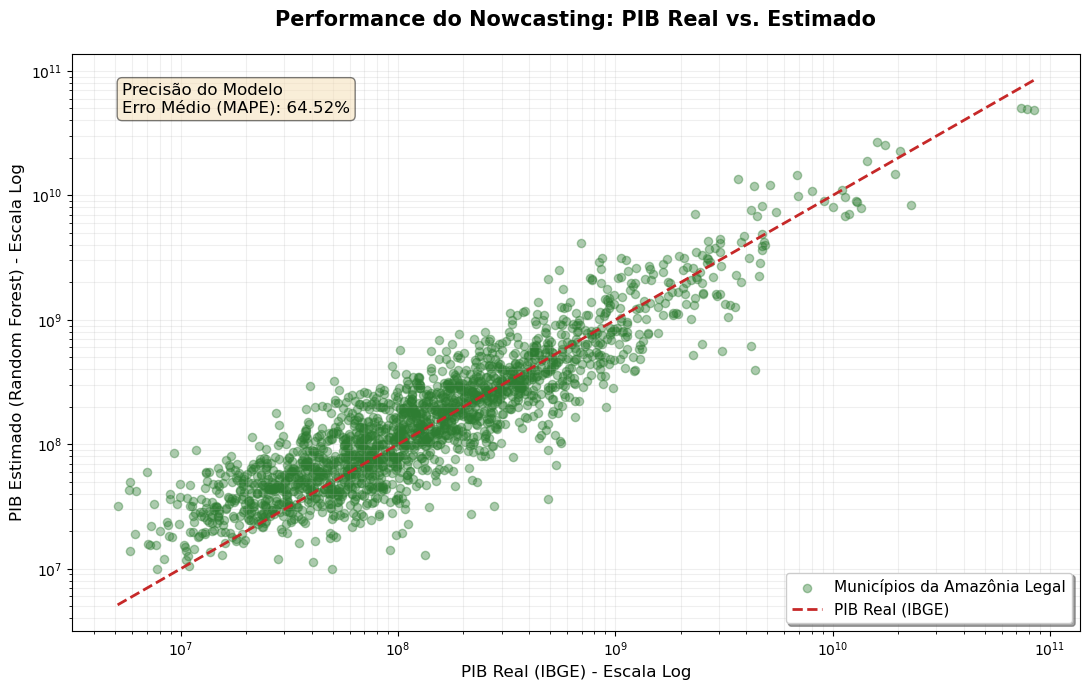

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Configurando o estilo e o tamanho
plt.figure(figsize=(11, 7))

# 2. Criando o gráfico com Escala Logarítmica (ESSENCIAL para dados econômicos)
# Isso permite ver tanto as cidades pequenas quanto as capitais no mesmo gráfico
plt.scatter(y_test, y_pred, alpha=0.4, color='#2e7d32', s=35, label='Municípios da Amazônia Legal')

# 3. Linha de Referência (Onde o modelo seria 100% perfeito)
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
if min_val <= 0: min_val = 1 # Log não aceita valores <= 0
plt.plot([min_val, max_val], [min_val, max_val], color='#c62828', linestyle='--', linewidth=2, label='PIB Real (IBGE)')

# 4. Aplicando a Transformação Logarítmica nos eixos
plt.xscale('log')
plt.yscale('log')

# 5. Títulos e Eixos Profissionais
plt.title('Performance do Nowcasting: PIB Real vs. Estimado', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('PIB Real (IBGE) - Escala Log', fontsize=12)
plt.ylabel('PIB Estimado (Random Forest) - Escala Log', fontsize=12)

# 6. Legenda e Box de Informação com o Erro (MAPE)
# Usamos a variável 'mape' que calculamos na célula anterior
textstr = f'Precisão do Modelo\nErro Médio (MAPE): {mape:.2%}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.legend(loc='lower right', fontsize=11, frameon=True, shadow=True)

# 7. Grid sutil para facilitar a leitura
plt.grid(True, which="both", ls="-", alpha=0.2)

# 8. Salvando em alta resolução para a sua tese
plt.tight_layout()
plt.savefig('grafico_pib_log_corrigido.png', dpi=300)
print("✅ Gráfico profissional gerado e salvo!")
plt.show()

#### **Célula 7:** Análise de Precisão por Município
Identificação dos 10 municípios onde o modelo obteve a maior acurácia (menor erro percentual absoluto). Esta análise permite discutir em quais perfis econômicos a integração RAIS-Luz Noturna apresenta melhor desempenho.

In [15]:
# 1. Criando dataframe de resultados
df_resultados = X_test.copy()
df_resultados['pib_real'] = y_test
df_resultados['pib_previsto'] = y_pred

# 2. Resgatando o ID do município e calculando o erro individual
# O índice do y_test preserva o índice original do df_final
df_resultados['id_municipio'] = df_final.loc[y_test.index, 'id_municipio']
df_resultados['erro_percentual'] = (abs(df_resultados['pib_real'] - df_resultados['pib_previsto']) / df_resultados['pib_real']) * 100

# 3. Pegando os 10 melhores (menor erro)
top_10_acertos = df_resultados.sort_values(by='erro_percentual').head(10)

print("🏆 Top 10 Municípios com Maior Precisão no Modelo:")
display(top_10_acertos[['id_municipio', 'pib_real', 'pib_previsto', 'erro_percentual']])

🏆 Top 10 Municípios com Maior Precisão no Modelo:


,id_municipio,pib_real,pib_previsto,erro_percentual
8098,1702158,65019000,65020120.0,0.001723
9990,2101939,105126000,105130980.0,0.004737
5974,1700707,218020000,217999340.0,0.009476
5168,1711951,22791000,22780060.0,0.048001
7580,1716653,75486000,75417120.0,0.091249
4667,1506138,855748000,854848780.0,0.10508
8734,1714302,48645000,48700790.0,0.114688
9820,1507102,183191000,182805640.0,0.21036
4222,1504455,258218000,257429710.0,0.305281
7864,5214879,39306000,39185500.0,0.306569


#### **Célula 8:** Salvando o Trabalho (Checkpoint)
Crie uma nova célula de código ao final do seu notebook e use este comando. Ele vai salvar os arquivos diretamente na sua pasta de dados no Google Drive:

In [19]:
import joblib
import os

# 1. Definindo o novo caminho sugerido
folder_path = r"G:\Meu Drive\MESTRADO\Dissertacao_mestrado\outputs"

# 2. Criando a pasta caso ela não exista
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"📁 Pasta 'outputs' criada com sucesso!")

# 3. Salvando o DataFrame Final (Parquet é ideal para 100k+ linhas)
df_final.to_parquet(os.path.join(folder_path, "df_painel_pib_rais_final.parquet"))

# 4. Salvando o Modelo Treinado (O Random Forest de 64% de erro)
joblib.dump(rf, os.path.join(folder_path, "modelo_rf_pib_amazonia.pkl"))

print(f"💾 Checkpoint concluído em: {folder_path}")
print("📦 Arquivos 'df_painel_pib_rais_final.parquet' e 'modelo_rf_pib_amazonia.pkl' salvos!")

💾 Checkpoint concluído em: G:\Meu Drive\MESTRADO\Dissertacao_mestrado\outputs
📦 Arquivos 'df_painel_pib_rais_final.parquet' e 'modelo_rf_pib_amazonia.pkl' salvos!
